In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

#Read the given CSV file, and view some sample records
housing = pd.read_csv(r'Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Converting all the (Yes,No) data into binary data
housing['mainroad']=housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom']=housing['guestroom'].map({'yes':1,'no':0})
housing['basement']=housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning']=housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea']=housing['prefarea'].map({'yes':1,'no':0})
housing['furnishingstatus']=housing['furnishingstatus'].map({'furnished':1,'semi-furnished':0.5,'unfurnished':0})
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [4]:
#Importing seaborn library for visualizations
import seaborn as sns

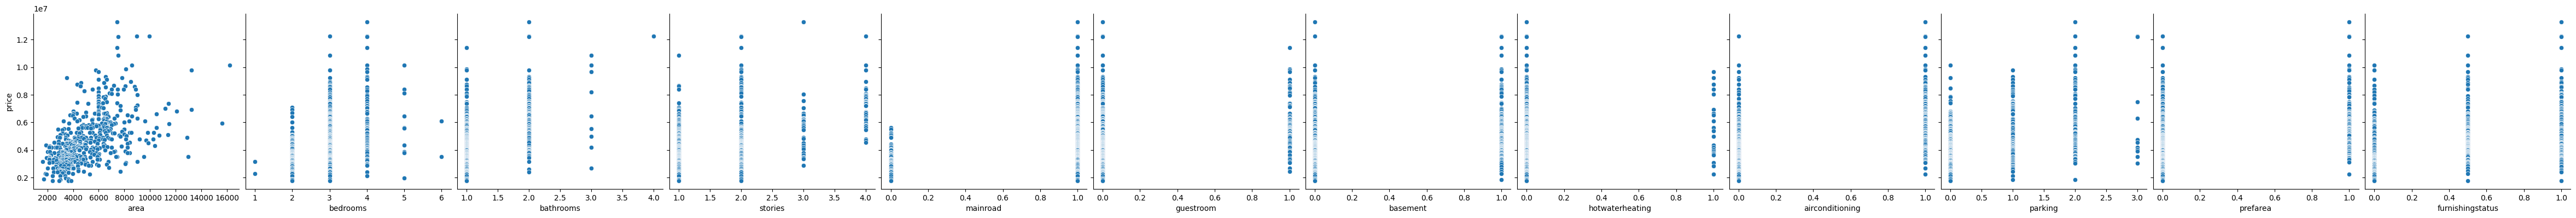

In [5]:
#to plot all the scatterplots in a single plot
sns.pairplot(housing, x_vars=['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], y_vars ='price', size=4, kind='scatter')
plt.show()

In [6]:
#Split the data into independent variables (X) and the dependent varibale (Y)
X=housing[['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
Y=housing[['price']]

In [7]:
#Importing important sklearn kl=libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
#Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
#Creating a linear regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_train, Y_train)

#Make predictions on the test set
Y_pred =  model.predict(X_test)

In [11]:
#Evaluate the model 
#CAUTION : Kindly execute all the ablove cells by pressing on the button present on the top of this cell before running this cell
print('Mean Absolute error :', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error :', metrics.root_mean_squared_error(Y_test,Y_pred))
print('Mean absolute Percentage Error :', metrics.mean_absolute_percentage_error(Y_test,Y_pred))

Mean Absolute error : 979679.6912959905
Mean Squared Error : 1771751116594.0352
Root Mean Squared Error : 1331071.4167895108
Mean absolute Percentage Error : 0.21307067875928506


In [24]:
#R2 value
R2= model.score(X,Y)
print(R2)


0.6763367647018423
